<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_SVR_Bajas_MES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión con soporte máquina vectorial (SVR)
# objetivo: Predecir las bajas del mes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data1 = pd.read_csv('/content/drive/My Drive/Dataset/DBajas_PERIODO.txt',delimiter='~')
x = data1.iloc [:,:-1].values
y = data1.iloc [:,1].values

In [ ]:
pd.DataFrame(x)

In [ ]:
pd.DataFrame(y)

### Codificar datos categóricos

In [ ]:
'''from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder  = LabelEncoder()
x[:,0] = labelencoder.fit_transform(x[:,0])
x[:,1] = labelencoder.fit_transform(x[:,1])
ct = ColumnTransformer([('one_hot_encoder',OneHotEncoder(categories='auto'),[0,1])],remainder='passthrough')
x= np.array(ct.fit_transform(x),dtype=np.integer)'''

"from sklearn.preprocessing import LabelEncoder, OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\nlabelencoder  = LabelEncoder()\nx[:,0] = labelencoder.fit_transform(x[:,0])\nx[:,1] = labelencoder.fit_transform(x[:,1])\nct = ColumnTransformer([('one_hot_encoder',OneHotEncoder(categories='auto'),[0,1])],remainder='passthrough')\nx= np.array(ct.fit_transform(x),dtype=np.integer)"

### Evitar la trampa de variables Dummy

In [ ]:
'''x = x[:,1:]'''

In [ ]:
pd.DataFrame(x)

### Dividimos los datos en entrenamiento y test

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state=0)

### Escalamos los datos

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train= sc_x.fit_transform(x_train)
y_train= sc_y.fit_transform(y_train.reshape(-1,1))

In [ ]:
len(x_train[:,0])

In [7]:
muestra=np.array([])
y_muestra=np.array([])
for i in range(0, 7):
    muestra=np.append(muestra,([x_train[:,0][i]]))
    y_muestra=np.append(y_muestra,([y_train[:,0][i]]))

### Ajustar las caracteristicas SVR

In [8]:
from sklearn.svm import SVR
regression = SVR(kernel='rbf')
regression.fit(muestra.reshape(-1,1),y_muestra.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
x_valor=sc_x.inverse_transform(muestra)
y_valor= sc_y.inverse_transform(y_muestra)
y_predic_valor= sc_y.inverse_transform(regression.predict(muestra.reshape(-1,1)))

In [12]:
xx = []; yy = []; yy_predic=[]
for i in range(7):
  xx.append([x_valor[i]])
  yy.append([y_valor[i]])
  yy_predic.append([y_predic_valor[i]])
print("x_valor = "+str(xx)+"\n")
print("y_valor = "+str(yy)+"\n")
print("y_predic"+str(yy_predic)+"\n")
# Concatenamos 
tabla = np.concatenate((xx, yy,yy_predic), axis=1)
print("Antes de organizar:"+"\n"+str(tabla)+"\n")
# Organizamos y recreamos tabla
tabla[:,0].sort()
for i in range(7):
  n_orgz =  tabla[i,0]
  for ii in range(7):
    n_norgz =  x_valor[ii]
    if (int(n_norgz) == int(n_orgz)):
      tabla[i,1] = y_valor[ii]
      tabla[i,2]= y_predic_valor[ii]
    else:
      pass 
print("Despues de organizar:"+"\n"+str(tabla)+"\n")

x_valor = [[201908.0], [201906.0], [201809.0], [202006.0], [201703.0], [202008.0], [201807.0]]

y_valor = [[19108.0], [19541.0], [21942.0], [20818.0], [42866.0], [25478.0], [23298.0]]

y_predic[[19763.69433368746], [19735.39123676838], [22597.69421816696], [22994.709848449987], [30106.826162874764], [23060.448852677513], [22746.517089506146]]

Antes de organizar:
[[201908.          19108.          19763.69433369]
 [201906.          19541.          19735.39123677]
 [201809.          21942.          22597.69421817]
 [202006.          20818.          22994.70984845]
 [201703.          42866.          30106.82616287]
 [202008.          25478.          23060.44885268]
 [201807.          23298.          22746.51708951]]

Despues de organizar:
[[201703.          42866.          30106.82616287]
 [201807.          23298.          22746.51708951]
 [201809.          21942.          22597.69421817]
 [201906.          19541.          19735.39123677]
 [201908.          19108.          19763.69433369

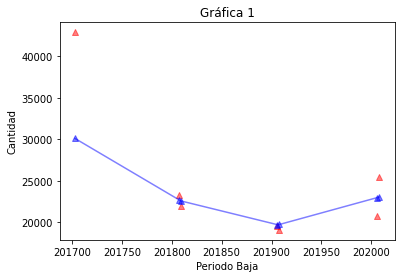

In [14]:
# Graficamos 
plt.scatter(tabla[:,0],tabla[:,1],color='Red', marker='^',alpha=0.5)
plt.plot(tabla[:,0],tabla[:,2],color='Blue', marker='^',alpha=0.5)
plt.title("Gráfica 1")
plt.xlabel("Periodo Baja")
plt.ylabel("Cantidad")
plt.show()

In [ ]:
nuevo= np.array([])
for i in range(202009 , 202012):
  nuevo= np.append(nuevo, i)
y_pred=sc_y.inverse_transform(regression.predict(sc_x.transform(nuevo.reshape(-1,1))))
pd.DataFrame(y_pred)

In [ ]:
pd.DataFrame(y_valor)

### Visualizar los resultados

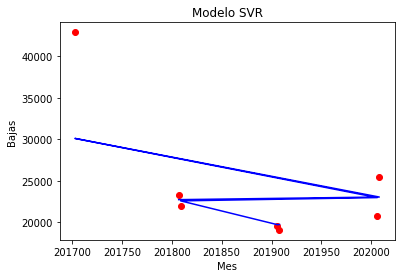

In [279]:
x_grid= np.arange(min(x_valor),max(x_valor),0.01)
x_grid= x_grid.reshape(len(x_grid),1)
plt.scatter(x_valor,y_valor,color="Red")
plt.plot(x_valor,y_predic_valor,color="blue")
plt.title("Modelo SVR")
plt.xlabel("Mes")
plt.ylabel("Bajas")
plt.show()

In [263]:
x_valor

array([201703., 201807., 201809., 201906., 201908., 202006., 202008.])

In [265]:
y_valor

array([19108., 19541., 21942., 20818., 42866., 25478., 23298.])

In [ ]:
pd.DataFrame(y_predic_valor)

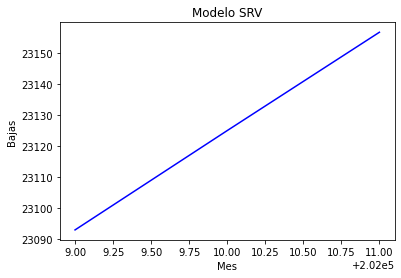

In [230]:
x_grid=np.arange(min(nuevo),max(nuevo),0.01)
x_grid= x_grid.reshape(len(x_grid),1)
'''plt.scatter(x_valor,y_valor,color="Red")'''
plt.plot(nuevo,y_pred,color="blue")
plt.title("Modelo SRV")
plt.xlabel("Mes")
plt.ylabel("Bajas")
plt.show()

In [18]:
pd.DataFrame(nuevo)

,0
0,202101.0
1,202102.0
2,202103.0
3,202104.0


In [19]:
pd.DataFrame(y_pred)

,0
0,23912.521751
1,23935.214312
2,23957.462290
3,23979.268714
